# George Horton Bootstrapping Average Word Length

The purpose of this code is to determine whether there was a change in the overall average word length in Horton's poems throughout his lifetime.
<br>There are only a few poems in some years, which will make finding a true average difficult. The method that will be used to help find a confidence intervall will be by bootstrapping new poems with replacemtn for all the years.

The null hypothesis is that there is no change in Horton's average word length over his lifetime.

The alternative hypothesis is that there is a change in Horton's average word length over his lifetime.

In [1]:
import pandas as pd

import numpy as np

from datascience import *

import nltk as nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raywz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
rays_df3 = pd.read_csv(r'eng190_data.csv')
rays_df3

,when_written,text_new
0,1829,creation fires my tongue nature thy anthems ra...
1,1829,oh heartless dove mount in the skies spread ...
2,1829,and wilt thou love my soul display and all ...
3,1829,alas and am i born for this to wear this slav...
4,1829,eliza tell thy lover why or what induced thee...
...,...,...
72,1851,departing love with much delight i think of t...
73,1851,departing love with much delight i think of ...
74,1826,following was written by george haughton the n...
75,1845,an acrostic to their little daughter my primog...


The next portion of code is to group poems by year and create a seperate dataframe for each.

In [3]:
df_1829 = rays_df3[rays_df3['when_written'] == 1829]
df_1837 = rays_df3[rays_df3['when_written'] == 1837]
df_1845 = rays_df3[rays_df3['when_written'] == 1845]
df_1844 = rays_df3[rays_df3['when_written'] == 1844]
df_1798 = rays_df3[rays_df3['when_written'] == 1798]
df_1840 = rays_df3[rays_df3['when_written'] == 1840]
df_1851 = rays_df3[rays_df3['when_written'] == 1851]
df_1829

,when_written,text_new
0,1829,creation fires my tongue nature thy anthems ra...
1,1829,oh heartless dove mount in the skies spread ...
2,1829,and wilt thou love my soul display and all ...
3,1829,alas and am i born for this to wear this slav...
4,1829,eliza tell thy lover why or what induced thee...
5,1829,whilst tracing thy visage i sink in emotion ...
6,1829,blest babe it at length has withdrawn the ser...
7,1829,am i sadly cast aside on misfortunes rugged t...
8,1829,een john the baptist did not know who christ t...
9,1829,hail thou auspicious vernal dawn ye birds pr...


In [ ]:
This will show the total number of poems per year.

In [6]:
len(df_1798)

11

In [10]:
len(df_1829)

11

In [11]:
len(df_1837)

10

In [12]:
len(df_1840)

2

In [13]:
len(df_1844)

1

In [14]:
len(df_1845)

47

In [17]:
len(df_1851)

2

The purpose of this portion is to make a list of all words used throughout the poems, and return a list of words.

In [19]:
def word_list(table):
    text = table['text_new'].values
    
    words = []
    for i in text:
        split_poems = i.split()
        words.append(split_poems)
    result = sum(words, [])
    return result

#word_list(df_1826)

In [20]:
list_1829 = word_list(df_1829)
list_1837 = word_list(df_1837)
list_1845 = word_list(df_1845)
list_1844 = word_list(df_1844)
list_1798 = word_list(df_1798)
list_1840 = word_list(df_1840)
list_1851 = word_list(df_1851)

Now to remove common words.

In [21]:
#This function removes all common stopwords from the nltk package
def remove_stop(array):
    stop_words = set(stopwords.words('english'))
    new_arr = []
    for i in array:
        if i not in stop_words:
            new_arr.append(i)
    return new_arr

In [22]:
clean_1829 = remove_stop(list_1829)
clean_1837 = remove_stop(list_1837)
clean_1845 = remove_stop(list_1845)
clean_1844 = remove_stop(list_1844)
clean_1798 = remove_stop(list_1798)
clean_1840 = remove_stop(list_1840)
clean_1851 = remove_stop(list_1851)
clean_1851[:10]

['departing',
 'love',
 'much',
 'delight',
 'think',
 'thee',
 'hower',
 'far',
 'away',
 'crave']

Now I will create a function to calculate the current mean.

In [23]:
def mean_word_length(list_by_year):
    word_list = []
    for i in list_by_year:
        word = len(i)
        word_list.append(word)
    return np.mean(word_list)

mean_word_length(clean_1829)

5.283446712018141

In [24]:
mean_1829 = mean_word_length(clean_1829)
mean_1837 = mean_word_length(clean_1837)
mean_1845 = mean_word_length(clean_1845)
mean_1844 = mean_word_length(clean_1844)
mean_1798 = mean_word_length(clean_1798)
mean_1840 = mean_word_length(clean_1840)
mean_1851 = mean_word_length(clean_1851)
mean_1829

5.283446712018141

In [25]:
mean_word_lengths = [mean_1829, mean_1837, mean_1845, mean_1844, mean_1798, mean_1840, mean_1851]
mean_word_lengths

[5.283446712018141,
 5.570266272189349,
 5.369041603503453,
 5.2318181818181815,
 5.412371134020619,
 4.948497854077253,
 5.273255813953488]

Next I will create a function that bootstraps lists that are 200 words in length from the list given, takes the average word length, and repeats a given number of times.

In [26]:
def bootstrap_new_word_lists(array, repetitions):
    new_df = pd.DataFrame(array)
    list_of_means = []
    for i in np.arange(repetitions):
        new_sample = new_df.sample(200, replace = True)
        new_sample_arr = new_sample[0].values
        mean_sample = mean_word_length(new_sample_arr)
        list_of_means.append(mean_sample)
    return list_of_means

bootstrap_new_word_lists(clean_1829, 10)

[5.37, 5.25, 5.43, 5.18, 5.465, 5.315, 5.05, 5.18, 5.29, 5.245]

I will now bootstrap 10,000 times per year given, and place everything into a table.

In [27]:
bootstrapped_years = Table().with_columns('1798', bootstrap_new_word_lists(clean_1798, 10000),
                                        '1829', bootstrap_new_word_lists(clean_1829, 10000),
                                         '1837', bootstrap_new_word_lists(clean_1837, 10000),
                                          '1840', bootstrap_new_word_lists(clean_1840, 10000),
                                          '1844', bootstrap_new_word_lists(clean_1844, 10000),
                                         '1845', bootstrap_new_word_lists(clean_1845, 10000),
                                         '1851', bootstrap_new_word_lists(clean_1851, 10000))
bootstrapped_years

1798,1829,1837,1840,1844,1845,1851
5.615,5.125,5.61,5.175,5.195,5.345,5.265
5.52,5.09,5.445,4.93,5.28,5.595,5.34
5.415,5.305,5.21,4.7,5.37,5.595,5.37
5.3,5.415,5.79,4.915,5.335,5.415,5.25
5.265,5.165,5.655,4.9,5.205,5.35,5.255
5.26,5.295,5.735,4.985,5.26,5.335,5.37
5.275,5.215,5.685,4.795,5.105,5.43,5.125
5.69,5.145,5.59,4.94,4.975,5.54,5.31
5.27,5.225,5.58,5.01,5.295,5.42,5.295
5.44,5.4,5.545,5.03,5.1,5.215,5.275


In [28]:
max(bootstrapped_years['1798'])

5.925

I will now create a function that plots the means on a histogram, and determines a confidence interval for our mean.


95% Confidence Interval first year = ( 5.165 5.655 )
95% Confidence Interval second year = ( 5.115 5.63 )


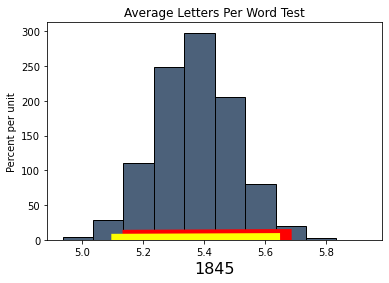

In [59]:
def mean_graph_confidenceinterval_test(Bootstrapped_Table, Column1, Column2):
    T2 = Bootstrapped_Table.select(Column1)
    left_end_1 = percentile(2.5, T2.column(0))
    right_end_1 = percentile(97.5, T2.column(0))
    
    T3 = Bootstrapped_Table.select(Column2)
    left_end_2 = percentile(2.5, T3.column(0))
    right_end_2 = percentile(97.5, T3.column(0))
    

    T3.hist()
    plt.plot(make_array(left_end_1, right_end_1), make_array(0, .01), color='red', lw=20, zorder=1)
    plt.plot(make_array(left_end_2, right_end_2), make_array(0, .01), color='yellow', lw=12, zorder=1)
    plt.title('Average Letters Per Word Test')
    
    print()
    
    print('95% Confidence Interval first year = (', left_end_1, right_end_1, ')')
    print('95% Confidence Interval second year = (', left_end_2, right_end_2, ')')
    
mean_graph_confidenceinterval_test(bootstrapped_years, '1798','1845')

95% Confidence Interval Lower Bound =  5.165
95% Confidence Interval Upper Bound =  5.655


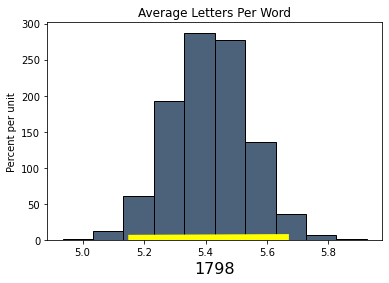

In [29]:
def mean_graph_confidenceinterval(Bootstrapped_Table, Column):
    T2 = Bootstrapped_Table.select(Column)
    left_end_1 = percentile(2.5, T2.column(0))
    right_end_1 = percentile(97.5, T2.column(0))

    T2.hist()
    plt.plot(make_array(left_end_1, right_end_1), make_array(0, .01), color='yellow', lw=10, zorder=1)
    plt.title('Average Letters Per Word')
    
    print('95% Confidence Interval Lower Bound = ', left_end_1)
    print('95% Confidence Interval Upper Bound = ', right_end_1)

mean_graph_confidenceinterval(bootstrapped_years, '1798')

95% Confidence Interval Lower Bound =  5.115
95% Confidence Interval Upper Bound =  5.63


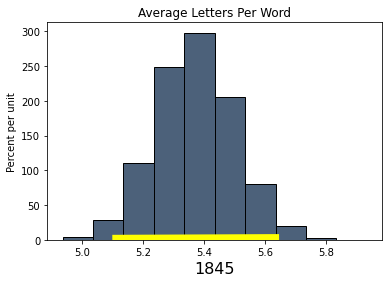

In [30]:
mean_graph_confidenceinterval(bootstrapped_years, '1845')

### The true average word length for 1798 was estimated with 95% confidence to be between 5.165 and 5.655.

### The true average word length for 1845 was estimated with 95% confidence to be between 5.115 and 5.63.

### These findings support the null hypothesis. The null hypothesis is that there is no statistically significant change over the course of Hortons lifetime. This is because the true average word length's confidence intervals overlapped.

I used 1798 as the start test years because it was the first year that poems were included from him in the corpus. I used 1845 as the test years because it had a much larger number of poems compared to 1851. 1851 was the last year poems were included from Horton in the corpus. 

# Bootstraps for years not included in test.

95% Confidence Interval Lower Bound =  5.04
95% Confidence Interval Upper Bound =  5.535


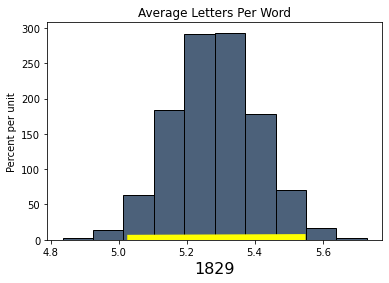

In [37]:
mean_graph_confidenceinterval(bootstrapped_years, '1829')

95% Confidence Interval Lower Bound =  5.31
95% Confidence Interval Upper Bound =  5.835


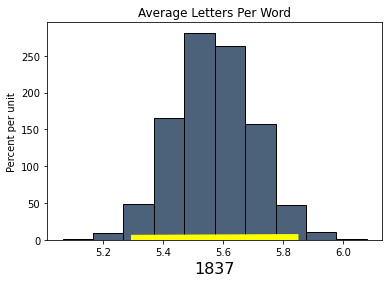

In [40]:
mean_graph_confidenceinterval(bootstrapped_years, '1837')

95% Confidence Interval Lower Bound =  4.735
95% Confidence Interval Upper Bound =  5.17


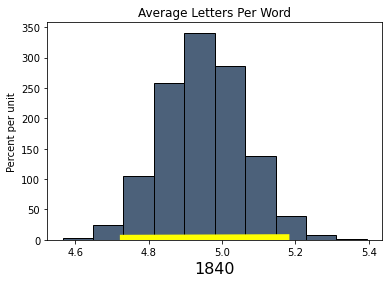

In [41]:
mean_graph_confidenceinterval(bootstrapped_years, '1840')

95% Confidence Interval Lower Bound =  5.005
95% Confidence Interval Upper Bound =  5.465


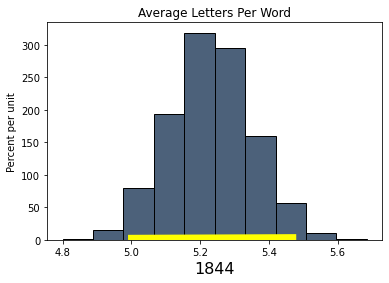

In [42]:
mean_graph_confidenceinterval(bootstrapped_years, '1844')

95% Confidence Interval Lower Bound =  5.02
95% Confidence Interval Upper Bound =  5.54


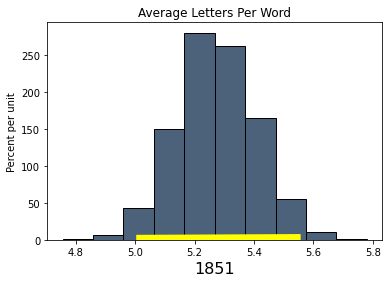

In [43]:
mean_graph_confidenceinterval(bootstrapped_years, '1851')